In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Read the City and Ride Data
city_data = pd.read_csv("/Users/MG/Desktop/NU - Homework/HW5/city_data.csv")
ride_data = pd.read_csv("/Users/MG/Desktop/NU - Homework/HW5/ride_data.csv")


# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on ="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

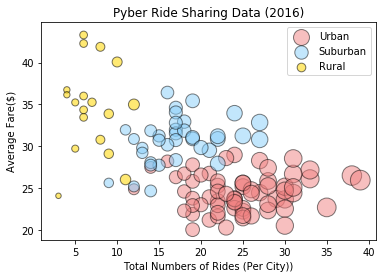

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban = combined_data.loc[(combined_data["type"] == "Urban")]
suburban = combined_data.loc[(combined_data["type"] == "Suburban")]
rural = combined_data.loc[(combined_data["type"] == "Rural")]

avg_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc='upper right')

# Save Figure
plt.savefig("/Users/MG/Desktop/NU - Homework/HW5/Bubble Plot of Ride Sharing Data")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

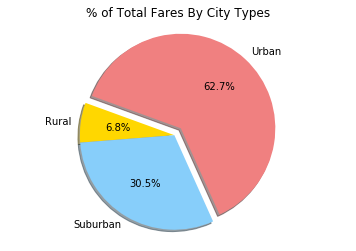

In [6]:
# Calculate Type Percents
total_fare = combined_data.groupby(['type'])['fare'].sum()
# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
# Save Figure
plt.savefig("/Users/MG/Desktop/NU - Homework/HW5/Total Fares By City Type")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

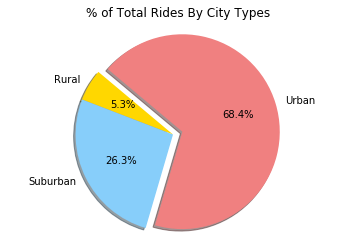

In [8]:
# Calculate Ride Percents
total_rides = combined_data.groupby(['type'])['ride_id'].count()
# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("/Users/MG/Desktop/NU - Homework/HW5/Total Rides By City Type")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

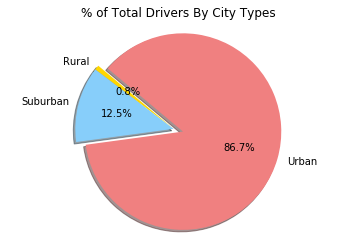

In [10]:
# Calculate Driver Percents
total_drivers = combined_data.groupby(['type'])['driver_count'].sum()
# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("/Users/MG/Desktop/NU - Homework/HW5/Total Drivers By City Type")

In [11]:
# Show Figure
plt.show()